In [1]:
# imports required packages

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from cf_matrix import make_confusion_matrix
from sklearn.metrics import accuracy_score

import numpy as np
import h5py
import os
import json
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
config={
  "model"           : "vgg16",
  "weights"         : "imagenet",
  "features_path"   : "car_damage_check/features.h5",
  "labels_path"     : "car_damage_check/labels.h5",
  "classifier_path" : "car_damage_check/classifier.pickle",
  "model_path"      : "cdd/car_damage_check/model",

  "test_size"       : 0.20,
  "seed"            : 9,
}

In [3]:
# config variables
test_size  = config["test_size"]
seed = config["seed"]
features_path = config["features_path"]
labels_path = config["labels_path"]
classifier_path = config["classifier_path"]

In [4]:
# import features and labels
h5f_data  = h5py.File(features_path, 'r')
h5f_label = h5py.File(labels_path, 'r')

features_string = h5f_data['dataset_1']
labels_string   = h5f_label['dataset_1']

features = np.array(features_string)
labels   = np.array(labels_string)

h5f_data.close()
h5f_label.close()

In [5]:
labels.shape

(1840,)

In [6]:
# verify the shape of features and labels
print ("[INFO] features shape: {}".format(features.shape))
print ("[INFO] labels shape: {}".format(labels.shape))

print ("[INFO] training started...")
# split the training and testing data
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(features),
                                                                  np.array(labels),
                                                                  test_size=test_size,
                                                                  random_state=seed)

print ("[INFO] splitted train and test data...")
print ("[INFO] train data  : {}".format(trainData.shape))
print ("[INFO] test data   : {}".format(testData.shape))
print ("[INFO] train labels: {}".format(trainLabels.shape))
print ("[INFO] test labels : {}".format(testLabels.shape))

[INFO] features shape: (1840, 4096)
[INFO] labels shape: (1840,)
[INFO] training started...
[INFO] splitted train and test data...
[INFO] train data  : (1472, 4096)
[INFO] test data   : (368, 4096)
[INFO] train labels: (1472,)
[INFO] test labels : (368,)


In [7]:
# Use logistic regression as the model
print ("[INFO] creating model...")
model = LogisticRegression(max_iter=500)
model.fit(trainData, trainLabels)

[INFO] creating model...


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
# evaluate the model of test data
preds = model.predict(testData)

In [9]:
# dump classifier to file
print ("[INFO] saving model...")
pickle.dump(model, open(classifier_path, 'wb'))

[INFO] saving model...


### Confusion Matrix

In [10]:
# plot the confusion matrix
cm = confusion_matrix(testLabels, preds)

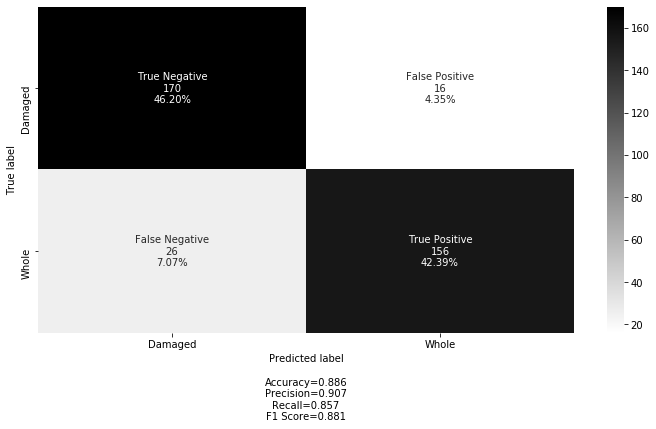

In [11]:
categories = ['Damaged', 'Whole']
labels = ['True Negative','False Positive','False Negative','True Positive']
make_confusion_matrix(cm, figsize=(12,6), 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')